In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel("/Users/umair/Downloads/projects/project_1/data/raw/monthly-births-june-2025.xlsx", sheet_name="Table_1")

In [3]:
# Filter data for Jan 1998 to Dec 2022 (inclusive)
months_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
df = df[df['Year'].between(1998, 2022)]
df = df[df['Month'].isin(months_order)]
df = df.sort_values(['Year', 'Month']).reset_index(drop=True)

In [4]:
df.head(30)

,Year,Month,NHS Board area,Births registered
0,1998,April,Ayrshire and Arran,366
1,1998,April,Borders,97
2,1998,April,Dumfries and Galloway,135
3,1998,April,Fife,311
4,1998,April,Forth Valley,252
5,1998,April,Grampian,488
6,1998,April,Greater Glasgow and Clyde,1105
7,1998,April,Highland,278
8,1998,April,Lanarkshire,620
9,1998,April,Lothian,712


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4486 entries, 0 to 4485
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Year               4486 non-null   int64 
 1   Month              4486 non-null   object
 2   NHS Board area     4486 non-null   object
 3   Births registered  4486 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 140.3+ KB


In [7]:
df.sample(10)

,Year,Month,NHS Board area,Births registered
4257,2021,May,Scotland,3554
1877,2008,July,Dumfries and Galloway,135
145,1998,November,Orkney,17
2748,2013,February,Fife,305
2199,2010,December,Lothian,882
803,2002,July,Lanarkshire,587
2593,2012,January,Tayside,380
1417,2005,October,Highland,261
1176,2004,June,Greater Glasgow and Clyde,1051
1250,2004,September,Grampian,472


In [8]:
df['Births registered'].describe()

count    4486.000000
mean      604.543469
std      1100.394941
min         1.000000
25%        91.000000
50%       285.000000
75%       562.750000
max      9233.000000
Name: Births registered, dtype: float64

/var/folders/mj/m27s8rsd79779v5k025nx2qr0000gn/T/ipykernel_2468/2138161141.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='NHS Board area', y='Births registered', data=df, ci=None, palette='tab20')
/var/folders/mj/m27s8rsd79779v5k025nx2qr0000gn/T/ipykernel_2468/2138161141.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='NHS Board area', y='Births registered', data=df, ci=None, palette='tab20')


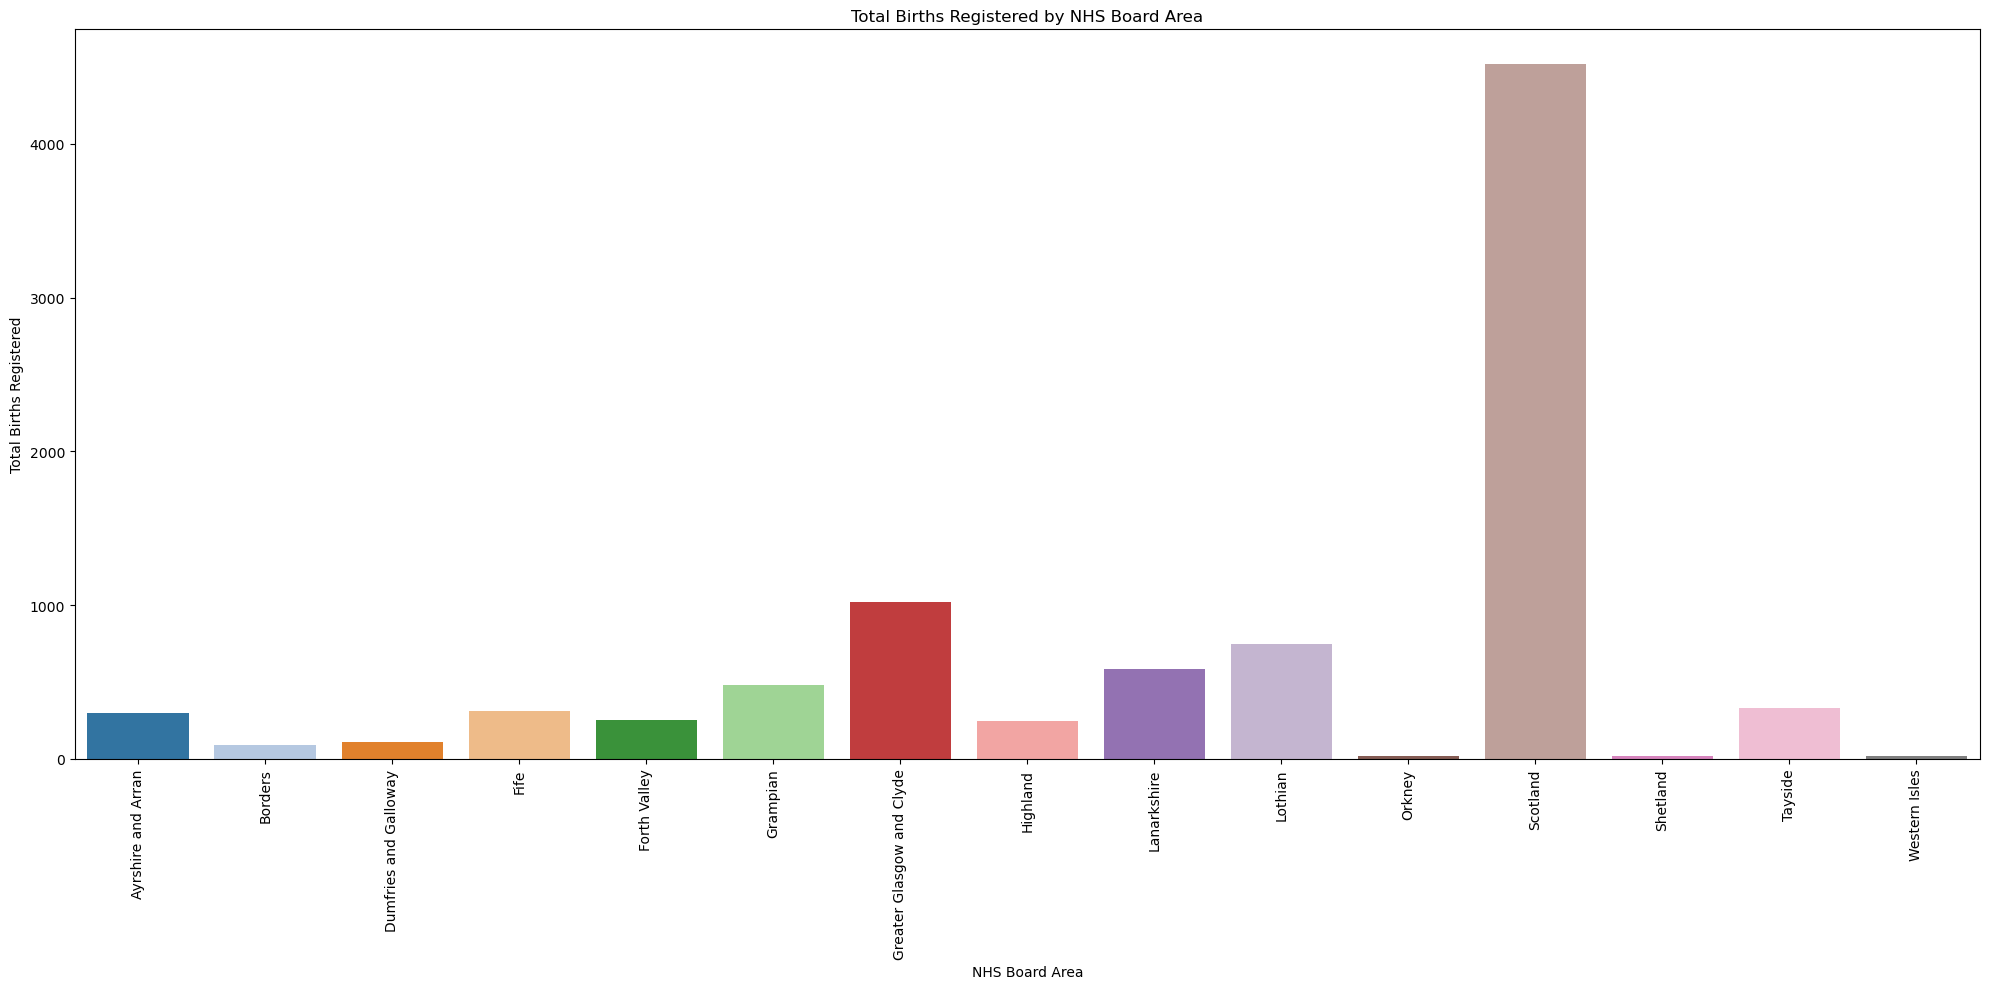

In [9]:
plt.figure(figsize=(20,10))
sns.barplot(x='NHS Board area', y='Births registered', data=df, ci=None, palette='tab20')
plt.title('Total Births Registered by NHS Board Area')
plt.xlabel('NHS Board Area')
plt.ylabel('Total Births Registered')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [10]:
# Remove Scotland aggregate row, keep only NHS Board areas
df= df[df['NHS Board area'] != 'Scotland']
df.head()

,Year,Month,NHS Board area,Births registered
0,1998,April,Ayrshire and Arran,366
1,1998,April,Borders,97
2,1998,April,Dumfries and Galloway,135
3,1998,April,Fife,311
4,1998,April,Forth Valley,252


In [ ]:
df['Births registered'].describe()

In [ ]:
plt.figure(figsize=(20,10))
sns.barplot(x='NHS Board area', y='Births registered', data=df, ci=None, palette='tab20')
plt.title('Total Births Registered by NHS Board Area')
plt.xlabel('NHS Board Area')
plt.ylabel('Total Births Registered')
plt.xticks(rotation=90)
plt.tight_layout()

In [ ]:
# Histogram of total births registered by NHS Board area (excluding Scotland)
plt.figure(figsize=(10, 5))
sns.histplot(x=df['Births registered'], bins=30, kde=True, color='skyblue')
plt.title('Histogram of Total Births Registered (Excluding Scotland)')
plt.xlabel('Total Births Registered')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

In [ ]:
# Boxplot of total births registered by NHS Board area (excluding Scotland)
plt.figure(figsize=(8, 2))
sns.boxplot(x=df['Births registered'], color='orange')
plt.title('Boxplot of Total Births Registered (Excluding Scotland)')
plt.xlabel('Total Births Registered')
plt.tight_layout()
plt.show()

In [ ]:
# IQR for outlier removal
Q1 = df['Births registered'].quantile(0.25)
Q3 = df['Births registered'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(f"Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")
df = df[(df['Births registered'] >= lower_bound) & (df['Births registered'] <= upper_bound)]

In [ ]:
# Boxplot of total births registered by NHS Board area (excluding Scotland)
plt.figure(figsize=(8, 2))
sns.boxplot(x=df['Births registered'], color='orange')
plt.title('Boxplot of Total Births Registered (Excluding Scotland)')
plt.xlabel('Total Births Registered')
plt.tight_layout()
plt.show()

In [ ]:
df['Births registered'] = np.log1p(df['Births registered'])

In [ ]:
df['Births registered'].describe()

In [ ]:
df.head()

In [ ]:
# Integer encoding for Month (January=1, ..., December=12)
months_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
df['Month'] = pd.Categorical(df['Month'], categories=months_order, ordered=True)
df['Month_num'] = df['Month'].cat.codes + 1

# Integer encoding for NHS Board area
df['NHS_Board_area_code'] = df['NHS Board area'].astype('category').cat.codes

In [ ]:
df.head()

In [ ]:
df = df.drop(columns=['NHS Board area', 'Month'])

In [ ]:
df.head()

In [ ]:
# Cyclical encoding for month-of-year
df['Month_sin'] = np.sin(2 * np.pi * df['Month_num'] / 12)
df['Month_cos'] = np.cos(2 * np.pi * df['Month_num'] / 12)

# Normalize year to [0, 1] for year-of-series embedding
df['Year_norm'] = (df['Year'] - df['Year'].min()) / (df['Year'].max() - df['Year'].min())

In [ ]:
df.sample(10)

In [ ]:
df.tail()

In [ ]:
# Split into training (1998–2018), validation (2019–2020), and test (2021–2022) sets, keeping NHS Board area info
train = df[(df['Year'] >= 1998) & (df['Year'] <= 2018)].reset_index(drop=True)
val = df[(df['Year'] >= 2019) & (df['Year'] <= 2020)].reset_index(drop=True)
test = df[(df['Year'] >= 2021) & (df['Year'] <= 2022)].reset_index(drop=True)

In [ ]:
df = df.drop(columns=['Year'])

In [ ]:
df.head()

In [ ]:
# Save the splits in .parquet format, including NHS Board area info
train.to_parquet("train.parquet", index=False)
val.to_parquet("val.parquet", index=False)
test.to_parquet("test.parquet", index=False)